In [4]:
import pandas as pd
import os
import nltk
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

Функция подсчитывает информацию о количестве слов в ячейке

In [5]:
def count_words(text : str):
    """Function counts information about the number of words in a cell
    
    Args:
        text (str) : 
    Return:
        len (List[str]): Ammount words in list with words from text
    """
    words = nltk.word_tokenize(text)
    words_only = [word for word in words if re.match(r"^\w+$", word)]
    return len(words_only)


Функция возвращает текст отзывов без пробелов

In [ ]:
def read_review(file_path : str):
    """Function returns the text of reviews without spaces
    
    Args:
        file_path (str) : path to the file to be read 
    Return:
        review_text(str) : ready text of reviews without spaces
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        if len(lines) >= 4:
            review_text = ''.join(line.rstrip() for line in lines[3:])
            return review_text.strip()
        else:
            return None       

Функция, фильтрующая строки, для которых значение в столбце с количеством слов меньше или равно заданному значению

In [ ]:
def filter_by_word_count(dataframe : pd.DataFrame, word_count : int):
    """Function that selects strings for which the value in the column 
    with the number of words is less than or equal to the specified value.
    Args:
        dataframe (pd.DataFrame): DataFrame with text information
        word_count (int): number of words
    Return:
        pd.DataFrame: DataFrame with a word count exceeding max count
    """
    return dataframe[dataframe['Количество слов'] <= word_count]

Функция, сортирующая набор данных по заданной метке DataFrame

In [ ]:
def filter_by_stars(dataframe : pd.DataFrame, label : str):
    """Function that sorts the dataset by the given DataFrame label.
    
    Args:
        dataframe (pd.DataFrame): DataFrame with text information
        label (str): DataFrame class label
    Return:
        pd.DataFrame: DataFrame with a number of stars
    """
    dataframe['Количество звёзд'] = dataframe['Количество звёзд'].astype(str)
    if label in ['1', '2', '3', '4', '5']:
        dataframe[dataframe['Количество звёзд'] == label]
    elif label == "other":
        dataframe[~dataframe['Количество звёзд'].isin(['1', '2', '3', '4', '5'])]
    else:
        raise ValueError("Неверное значение для метки класса. Допустимые значения: от 1 до 5 и 'other'")
    return dataframe

Функция построить график с помощью matplotlib Ось x - частота встречаемости, ось y - слово

In [ ]:
def plot_word_histogram(dataframe : pd.DataFrame, label : str):
    """ Function make plot with matplotlib x-axe is a frequency of occurrence, y-axe is a word
    Args: 
        dataframe (pd.DataFrame): DataFrame with text information
        label (str): DataFrame class label
    """
    dataframe['Количество звёзд'] = dataframe['Количество звёзд'].astype(str)
    if label == "other":
        text_block = " ".join(dataframe[~dataframe['Количество звёзд'].isin(['1', '2', '3', '4', '5'])]['Текст рецензии'])
    else:
        text_block = " ".join(dataframe[dataframe['Количество звёзд'] == label]['Текст рецензии'])
    tokens = word_tokenize(text_block)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum()]
    word_freq = Counter(lemmatized_tokens)
    sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:20]) 
    
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_word_freq.keys(), sorted_word_freq.values())
    plt.xlabel('Слова')
    plt.ylabel('Частота встречаемости')
    plt.title('Гистограмма слов для метки класса ' + str(label))
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    for i, (word, freq) in enumerate(sorted_word_freq.items()):
        plt.text(i, freq + 0.5, str(freq), ha='center', va='bottom', rotation=90, fontsize=8)
    plt.show()

In [ ]:
    
root_folder = 'data'

In [ ]:
for folder in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                review_text = read_review(file_path)
                data.append({'Количество звёзд': folder, 'Текст рецензии': review_text})

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.fillna('ПУСТОЙ ОТЗЫВ', inplace=True)

In [ ]:
df['Количество слов'] = df['Текст рецензии'].apply(count_words)

|Количество звёзд|                                  Текст рецензии|  Количество слов|
|----------------|------------------------------------------------|-----------------|
|0               |Чистый ужас не для слабонервных, каюсь- не до...|              134|
|1               |Отфильтровав мат от нормальной речи, я готова...|              208|
|2               |Когда книга вроде бы пытается говорить о пр...  |               55|
|3               |Во-первых, без перевода РОСМЭН: с меланхольно...|              103|
|4               |Волшебный мир со своей магией, силой, традици...|              135|

In [ ]:
print(df.head())

In [ ]:
numeric_info1 = df[['Количество звёзд']].describe()
print(numeric_info1)

|       | Количество звёзд|
|-------|-----------------|
|count  |              618|
|unique |                5|
|top    |                5|
|freq   |              387|

In [ ]:
numeric_info2 = df[['Количество слов']].describe()
print(numeric_info2)

|     |  Количество слов|
|-----|-----------------|
|count|       618.000000|
|mean |       246.289644|
|std  |       218.933969|
|min  |         2.000000|
|25%  |       109.000000|
|50%  |       194.500000|
|75%  |       302.750000|
|max  |      1930.000000|

In [ ]:
df.to_csv('data.csv', index=False)

In [ ]:
filtered_df = filter_by_word_count(df,20)
print(filtered_df)
filtered_df.to_csv('data_of_filtered_df_by_words.csv', index=False)

|Количество звёзд   |                                  Текст рецензии|  Количество слов|
|-------------------|------------------------------------------------|-----------------|
|5                  |Не могу прочитать ни одну книгу на сайте. Ест...|               12|
|53                 |Устала от детского лепета. Мне кажется, кни...  |               14|
|75                 |А я не буду ничего писать. Просто Несколько р...|               15|
|180                |очень, запутанной, много персонажей, в которы...|               13|
|207                |Прочитала татуировки менеджера, и сразу купил...|               17|
|229                |Полезные советы на тему здоровья, но ооооче...  |               18|
|384                |У меня восторг от этой книги!Брали на подарок...|               18|
|480                |После первой книги, сразу же взялась за втору...|               20|
|537                |Сюжет не понравился от слова совсем и слог не...|               15|
|554                |Актуальная для меня книга. Почерпнула много н...|               15|
|598                |Пронзительная история людей, выбора и последс...|               16|
|602                |Ждем, ждем, ждем!                               |                3|
|612                |Жду книгу сильнее, чем новый год!               |                6|
|614                |Очень жду выхода книги! Тема снов и вмешатель...|               13|
|617                |ПУСТОЙ ОТЗЫВ                                    |                2|

In [ ]:
filterd_df_by_stars = filter_by_stars(df, "1")
print(filterd_df_by_stars)
filterd_df_by_stars.to_csv('data_filterd_df_by_stars.csv', index=False)

|Количество звёзд   |                                      Текст рецензии|  Количество слов|
|-------------------|----------------------------------------------------|-----------------|
|0                  |    Чистый ужас не для слабонервных, каюсь- не до...|              134|
|1                  |    Отфильтровав мат от нормальной речи, я готова...|              208|
|2                  |      Когда книга вроде бы пытается говорить о пр...|               55|
|3                  |    Во-первых, без перевода РОСМЭН: с меланхольно...|              103|
|4                  |    Волшебный мир со своей магией, силой, традици...|              135|
|..               ...                                                ... |             ... |
|613                |    «Пламя в твоей душе невозможно связать, иди з...|              345|
|614                |    Очень жду выхода книги! Тема снов и вмешатель...|               13|
|615                |    «У вас здесь какое-то безумие по безумию кати...|              483|
|616                |      Мне так понравилась книга "Женщина в белом"...|              180|
|617                |                                        ПУСТОЙ ОТЗЫВ|                2|

In [ ]:
grouped = df.groupby('Количество звёзд')['Количество слов'].agg(['max', 'min', 'mean'])
print(grouped)

|Количество звёзд|     max|    min|          mean|
|----------------|--------|-------|--------------|
|1               |     545|     12|    195.333333|
|2               |    1111|     50|    240.636364|
|3               |    1806|     14|    257.358209|
|4               |    1422|     13|    259.214815|
|5               |    1930|      2|    242.395349|

In [ ]:
plot_word_histogram(df, '2')

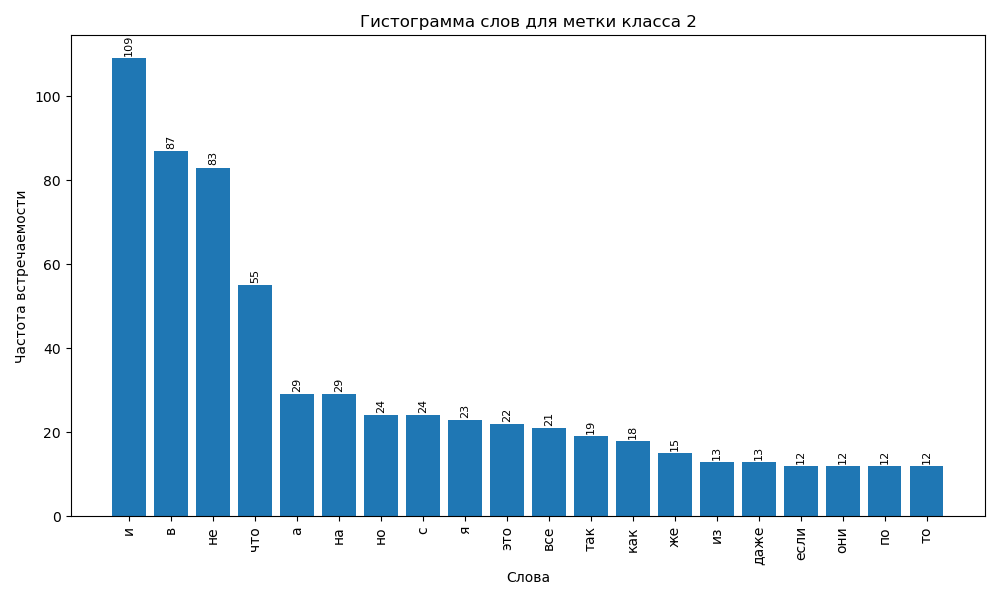